In [17]:
%matplotlib inline
from scipy import ndimage as ndi
import matplotlib.pyplot as plt
from skimage import data, img_as_float,color, img_as_ubyte
from skimage import color, io
from skimage.feature import peak_local_max, canny
from skimage.transform import hough_circle,hough_circle_peaks,hough_line, hough_line_peaks
from skimage.draw import circle_perimeter
from skimage.filters import try_all_threshold, threshold_otsu, gaussian
from skimage.morphology import watershed, skeletonize
from skimage.segmentation import chan_vese, felzenszwalb, slic, quickshift, watershed,mark_boundaries
from skimage.measure import regionprops
from matplotlib import cm
import numpy as np


In [18]:
img = io.imread('images/MAX_BRCA1 C20 SCBT 50 and TBK1 A6 SCBT 100 ivt 4.tif')
img = img_as_float(img)
img = gaussian(img)
img_ch0 = img[:,:,0]
img_ch1 = img[:,:,1]
img_ch2 = img[:,:,2] 
#fig, ax = try_all_threshold(img_ch0, figsize=(8, 16), verbose=False)
#plt.show()

C:\Users\nvkkr\Anaconda3\lib\site-packages\skimage\filters\_gaussian.py:122: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  warn(RuntimeWarning(msg))


Our calculated threshold value. 0.35702154062699326


Text(0.5, 1.0, 'Intensity histogram')

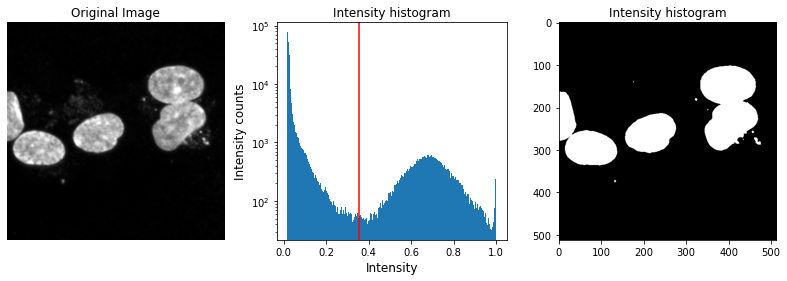

In [19]:
thresh = threshold_otsu(img_ch0)
binary = img_ch0 > thresh
print('Our calculated threshold value.',thresh)
fig, ax = plt.subplots(1,3, figsize=(14, 4))
ax[0].imshow(img_ch0, cmap="gray")
ax[0].set_axis_off()
ax[0].set_title("Original Image", fontsize=12)
ax[1].hist(img_ch0.reshape(-1),bins=256)#Generate histogram.
ax[1].set_yscale("log")
ax[1].axvline(thresh, color='r')
ax[1].set_title("Intensity histogram", fontsize=12)
ax[1].set_ylabel("Intensity counts", fontsize=12)
ax[1].set_xlabel("Intensity", fontsize=12)
ax[2].imshow(binary, cmap="gray")
ax[2].set_title("Intensity histogram", fontsize=12)

Text(0.5, 1.0, 'Labelled cells')

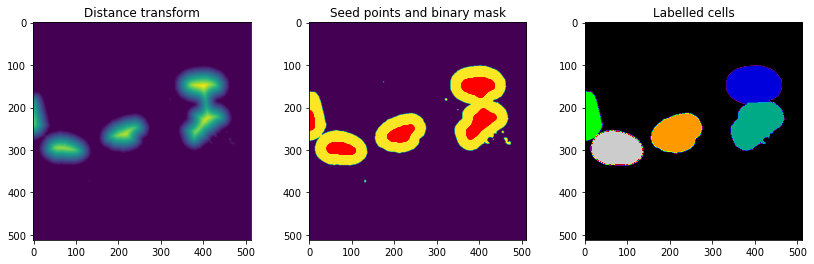

In [20]:
distance = ndi.distance_transform_edt(binary)
local_maxi = np.copy(distance)
local_maxi = local_maxi>(np.max(local_maxi)*0.7)
coordinates = np.where(local_maxi)
markers = ndi.label(local_maxi)[0]
labels = watershed(-distance, markers, mask=binary)
fig, ax = plt.subplots(1,3, figsize=(14, 4))
ax[0].imshow(distance)
ax[0].set_title("Distance transform", fontsize=12)
ax[1].plot(coordinates[1],coordinates[0],'ro')
ax[1].set_title("Seed points and binary mask", fontsize=12)
ax[1].imshow(binary)
ax[2].imshow(labels,cmap=plt.cm.nipy_spectral)
ax[2].set_title("Labelled cells", fontsize=12)

Text(0.5, 1.0, 'Pruned Maxima')

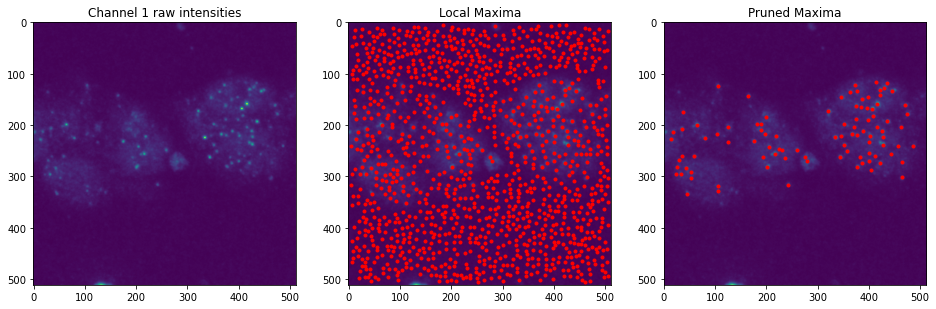

In [21]:
image_max = ndi.maximum_filter(img_ch1, size=5, mode='constant')
coordinates_raw = peak_local_max(img_ch1, min_distance=5)
THR = np.mean(img_ch1)+(np.std(img_ch1)*3.)
coordinates = coordinates_raw[img_ch1[coordinates_raw[:,0],coordinates_raw[:,1]]>THR,:]
fig, ax = plt.subplots(1,3, figsize=(16, 8))
ax[0].imshow(img_ch1)
ax[0].set_title("Channel 1 raw intensities", fontsize=12)
ax[1].imshow(img_ch1)
ax[1].plot(coordinates_raw[:, 1], coordinates_raw[:, 0], 'r.')
ax[1].set_title("Local Maxima", fontsize=12)
ax[2].imshow(img_ch1)
ax[2].plot(coordinates[:, 1], coordinates[:, 0], 'r.')
ax[2].set_title("Pruned Maxima", fontsize=12)

In [22]:
props = regionprops(labels)
for prop in props:
    print(prop.centroid)

(146.80869380380486, 396.02200021256243)
(239.67959493670887, 401.1151392405063)
(222.7718253968254, 15.745464852607709)
(260.63580618011304, 215.46747625345677)
(296.69649319855233, 73.8969175090478)
